In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.__version__

'2.1.0'

In [3]:
# datasets
orbit = pd.read_csv('./orbit.csv')

# Introducing `keras`

# Your first neural network

## Hello nets!

In [5]:
# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(10, input_shape=(2,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## Counting parameters

In [8]:
# Instantiate a new Sequential model
model = Sequential()

# Add a Dense layer with five neurons and three inputs
model.add(Dense(5, input_shape=(3,), activation="relu"))

# Add a final Dense layer with one neuron and no activation
model.add(Dense(1))

# Summarize your model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


## Build as shown

In [10]:
# Instantiate a Sequential model
model = Sequential()

# Build the input and hidden layer
model.add(Dense(3, input_shape=(2,)))

# Add the ouput layer
model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


# Surviving a meteor strike

In [12]:
print(orbit.shape)
orbit.head()

(2000, 2)


,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [13]:
time_steps = orbit['time_steps'].to_numpy(np.float32)
y = orbit['y'].to_numpy(np.float32)

## Specifying a model

In [16]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(1,), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

## Training

In [18]:
# Compile your model
model.compile(optimizer = 'adam', loss = 'mse')

print("Training started..., this can take a while:")

# Fit your model on your data for 30 epochs
model.fit(time_steps,y, epochs = 30)

# Evaluate your model 
print("Final loss value:",model.evaluate(time_steps, y))

Training started..., this can take a while:
Train on 2000 samples
Epoch 1/30
2000/2000 [==============================] - 7s 4ms/sample - loss: 1529.6180
Epoch 2/30
2000/2000 [==============================] - 0s 171us/sample - loss: 252.4443
Epoch 3/30
2000/2000 [==============================] - 0s 177us/sample - loss: 140.1336
Epoch 4/30
2000/2000 [==============================] - 0s 175us/sample - loss: 122.1196
Epoch 5/30
2000/2000 [==============================] - 0s 170us/sample - loss: 99.6430
Epoch 6/30
2000/2000 [==============================] - 0s 179us/sample - loss: 75.3338
Epoch 7/30
2000/2000 [==============================] - 0s 181us/sample - loss: 52.7742
Epoch 8/30
2000/2000 [==============================] - 0s 170us/sample - loss: 33.5034
Epoch 9/30
2000/2000 [==============================] - 0s 173us/sample - loss: 20.3797
Epoch 10/30
2000/2000 [==============================] - 0s 180us/sample - loss: 13.1418
Epoch 11/30
2000/2000 [===========================

## Predicting the orbit!

In [19]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds)/2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")
    plt.show()

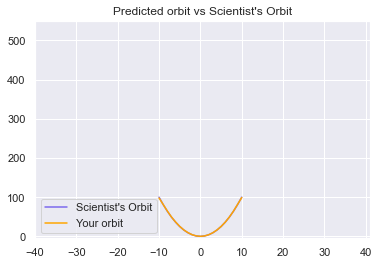

In [20]:
twenty_min_orbit = model.predict(np.arange(-10, 11))
plot_orbit(twenty_min_orbit)

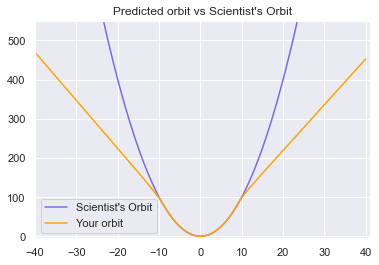

In [21]:
# Predict the eighty minute orbit
eighty_min_orbit = model.predict(np.arange(-40, 41))

# Plot the eighty minute orbit 
plot_orbit(eighty_min_orbit)

Your model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit! However, it starts to diverge when predicting for new values we haven't trained for. This shows neural networks learn according to the data they are fed with. Data quality and diversity are very important. You've barely scratched the surface of what neural networks can do.